### Parte 4: Revisión de casos

El objetivo de este fichero es intentar caracterizar cada uno de los casos del conjunto de validación. Para ello, comenzaremos mostrando estadísticos básicos, matriz de correlaciones respecto de las componentes vectoriales del viento, y luego algunos gráficos de caja para revisar la distribución de las variables. 


#### 4.1 Distribuciones de Weibull:

Acá debe haber algún tipo de descripción, pero ni idea:

2019_08_23 - Parámetro de forma (k): 1.96, Parámetro de escala (λ): 7.95
2022_11_25 - Parámetro de forma (k): 1.71, Parámetro de escala (λ): 5.30
2015_10_21 - Parámetro de forma (k): 2.08, Parámetro de escala (λ): 6.11
2019_11_20 - Parámetro de forma (k): 1.77, Parámetro de escala (λ): 4.75
2019_11_06 - Parámetro de forma (k): 2.02, Parámetro de escala (λ): 5.61
2020_11_13 - Parámetro de forma (k): 2.10, Parámetro de escala (λ): 5.27
2022_07_16 - Parámetro de forma (k): 2.21, Parámetro de escala (λ): 8.71
2022_08_10 - Parámetro de forma (k): 2.10, Parámetro de escala (λ): 8.72


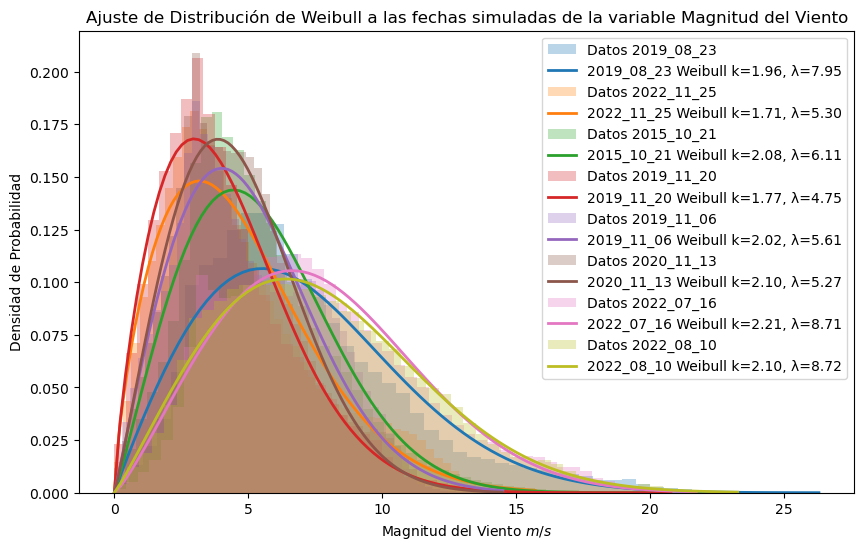

CPU times: user 6min 12s, sys: 34.8 s, total: 6min 47s
Wall time: 6min 47s


In [3]:
%%time 

from scipy.stats import weibull_min
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


colores =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#bcbd22']
fechas_val =["2019_08_23", "2022_11_25", "2015_10_21", "2019_11_20", 
                 "2019_11_06", "2020_11_13","2022_07_16", "2022_08_10"]

valores= []

plt.figure(figsize=(10, 6))

for i in range(8): #8 casos

    u = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/u10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]  # Reemplaza con tus datos reales
    v = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/v10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]
    
    velocidad = np.sqrt(u**2 + v**2).flatten()
    shape, loc, scale = weibull_min.fit(velocidad, floc=0) #floc=0 implica valores no negativos
    print(f"{fechas_val[i]} - Parámetro de forma (k): {shape:.2f}, Parámetro de escala (λ): {scale:.2f}")
    x = np.linspace(velocidad.min(),  velocidad.max(), 100)
    weibull_pdf = weibull_min.pdf(x, shape, loc, scale)
    
    valores.append([shape, scale])
    # Crear el histograma y la curva ajustada
    plt.hist(velocidad, bins=50, density=True, alpha=0.3, color=colores[i], label=f'Datos {fechas_val[i]}')
    plt.plot(x, weibull_pdf, color=colores[i], lw=2, label=f'{fechas_val[i]} Weibull k={shape:.2f}, λ={scale:.2f}')

plt.xlabel('Magnitud del Viento $m/s$')
plt.ylabel('Densidad de Probabilidad')
plt.title('Ajuste de Distribución de Weibull a las fechas simuladas de la variable Magnitud del Viento')
plt.legend()
plt.show()

In [4]:
info = pd.DataFrame(index=fechas_val, columns=["forma_k", "escala_lambda"])
for i in range(8):
    info.loc[ fechas_val[i] ] =  valores[i]

info 

,forma_k,escala_lambda
2019_08_23,1.959382,7.948743
2022_11_25,1.712608,5.29654
2015_10_21,2.075832,6.113849
2019_11_20,1.773325,4.749394
2019_11_06,2.024449,5.611344
2020_11_13,2.095519,5.271067
2022_07_16,2.208882,8.709084
2022_08_10,2.096901,8.719851


#### 4.2 Rosa de los vientos: 

Aplicado a todo el conjunto de validación:

/var/folders/b6/l2v3bp_n0cn2_970fhmx0qr40000gn/T/ipykernel_6572/3888366617.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


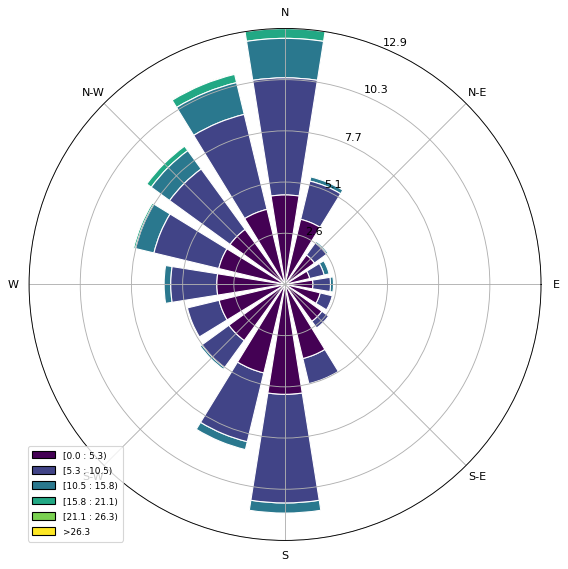

In [5]:
from windrose import WindroseAxes

path= "../../parches_winscp/bicubic_32_32/190824_16_va/raw/"
u10 = np.load(f"{path}u10_input_raw_190824_16_va.npy")[:,:,:,0]
v10 = np.load(f"{path}v10_input_raw_190824_16_va.npy")[:,:,:,0]
velocidad = np.sqrt(u10**2 + v10**2)
direccion = (np.arctan2(-u10, -v10) * (180 / np.pi)) % 360


ax = WindroseAxes.from_ax()
ax.bar(direccion.flatten(), velocidad.flatten(), normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.tight_layout()
plt.show()

Aplicado a cada caso simulado, acompañado del conjunto total:

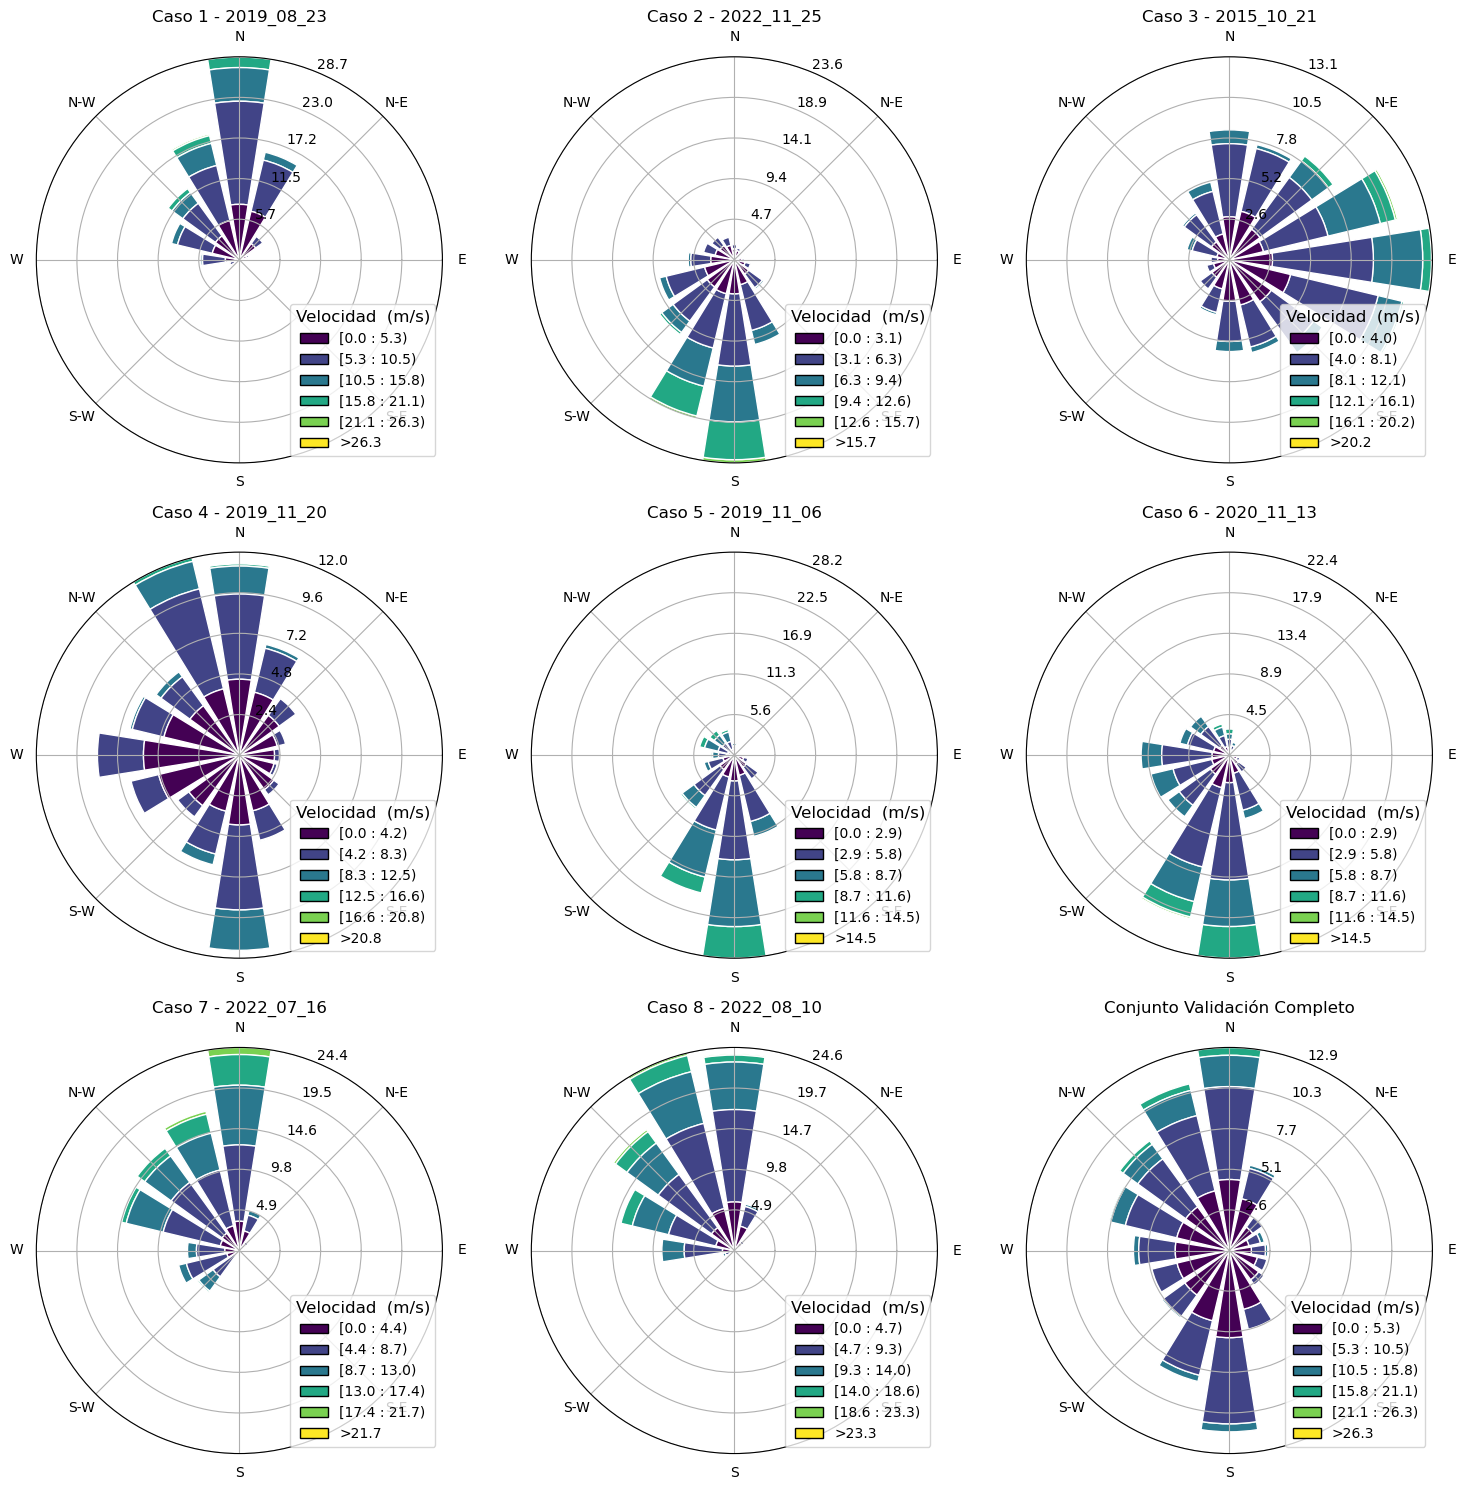

In [6]:
fig, axs = plt.subplots(3, 3, subplot_kw={'projection': 'windrose'}, figsize=(15, 15))

for i, ax in enumerate(axs.flat):

    if i != 8: 
        u10_i = np.load(f"{path}u10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]
        v10_i = np.load(f"{path}v10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]
        velocidad_i = np.sqrt(u10_i**2 + v10_i**2)
        direccion_i =  (np.arctan2(-u10_i, -v10_i) * (180 / np.pi)) % 360

        ax.bar(direccion_i.flatten(), velocidad_i.flatten(), normed=True, opening=0.8, edgecolor='white')
        ax.set_title(f'Caso {i+1} - {fechas_val[i]}', fontsize=12)
        legend = ax.legend(title="Velocidad  (m/s)", loc="lower right", fontsize=10)
        plt.setp(legend.get_title(), fontsize=12)

    else: 

        u10_i = np.load(f"{path}u10_input_raw_190824_16_va.npy")[:,:,:,0]
        v10_i = np.load(f"{path}v10_input_raw_190824_16_va.npy")[:,:,:,0]
        velocidad_i = np.sqrt(u10_i**2 + v10_i**2)
        direccion_i =  (np.arctan2(-u10_i, -v10_i) * (180 / np.pi)) % 360

        ax.bar(direccion_i.flatten(), velocidad_i.flatten(), normed=True, opening=0.8, edgecolor='white')
        ax.set_title(f'Conjunto Validación Completo', fontsize=12)
        legend = ax.legend(title="Velocidad (m/s)", loc="lower right", fontsize=10)
        plt.setp(legend.get_title(), fontsize=12)

plt.tight_layout()
plt.show()


#### 4.3 Estadísticos básicos para cada variable por caso simulado

In [8]:
def mostrar_stats(var_name): 

    var_names  =["u10", "v10", "hgt", "xland", "pblh", "psfc", "th2", "t2"]
    
    fechas_val =["2019_08_23", "2022_11_25", "2015_10_21", "2019_11_20", 
                 "2019_11_06", "2020_11_13","2022_07_16", "2022_08_10"]
    stats_names= ["min", "max", "mediana", "mean", "std", "var"]
    info       = pd.DataFrame(index=fechas_val, columns=stats_names)

    if var_name not in var_names: 
        return print("Nombre de la variable no encontrado")
    
    else: 
        var_array = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var_name}_input_raw_190824_16_va.npy")[:,:,:,0]

    for i in range(8): 
        var_array_i = var_array[i*(115*156):(115*156)*(i+1)]

        media_global    = np.mean(var_array_i)
        std_global      = np.std(var_array_i)
        varianza_global = np.var(var_array_i)
        med_global      = np.median(var_array_i)
        min_global      = np.min(var_array_i)
        max_global      = np.max(var_array_i)

        info.loc[ fechas_val[i]] = [min_global, max_global, med_global, media_global, std_global, varianza_global]

    print(f"Estadísticos para la variable {var_name}")

    for col in info.columns:
        info[col] = pd.to_numeric(info[col]).astype(np.float32)

    return info 

info_ex = mostrar_stats("v10")
info_ex

Estadísticos para la variable v10


,min,max,mediana,mean,std,var
2019_08_23,-25.444092,9.894619,-4.881279,-5.542253,4.221656,17.822380
2022_11_25,-8.648632,14.007813,2.839533,3.305979,3.682893,13.563700
2015_10_21,-12.538565,11.618812,-0.530413,-0.623765,3.752494,14.081213
2019_11_20,-16.481678,11.252048,-0.389000,-0.510156,4.207402,17.702232
2019_11_06,-12.557677,12.130870,3.186630,3.014009,3.859845,14.898406
2020_11_13,-11.765018,13.392460,2.333540,2.185193,3.795496,14.405789
2022_07_16,-21.635998,14.802278,-4.296863,-4.552488,5.279343,27.871458
2022_08_10,-22.107195,9.235903,-4.977944,-5.469386,3.951645,15.615495


#### 4.4 Estadísticos por cuadrante: 

In [9]:
var_names  =["u10", "v10", "hgt", "xland", "pblh", "psfc", "th2", "t2"]
stats_names= ["min", "max", "mediana", "mean", "std", "var"]
array_156  = []


var_array = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var_names[0]}_input_raw_190824_16_va.npy")[:,:,:,0]

for i in range(156): 
    casos= []
    var_array_i = var_array[i::156] #cada 156 parches equivalente al mismo tiempo

    for j in range(8): 
        var_array_j = var_array_i[115*j: 115*(j+1)] #bloques de 115 parches por cada caso
        media_global    = np.mean(var_array_j)
        std_global      = np.std(var_array_j)
        varianza_global = np.var(var_array_j)

        casos.append( [media_global, std_global, varianza_global] ) 

    array_156.append(casos)

print("Cantidad de elementos variable array_156: ", len(array_156)) # 156 parches
print("Cantidad de elementos variable array_156[i] ", len(array_156[0])) #8 casos 
print("Cantidad de elementos variable array_156[i][j]: ", len(array_156[0][0])) #3 métricas: [media, std, var]


Cantidad de elementos variable array_156:  156
Cantidad de elementos variable array_156[i]  8
Cantidad de elementos variable array_156[i][j]:  3


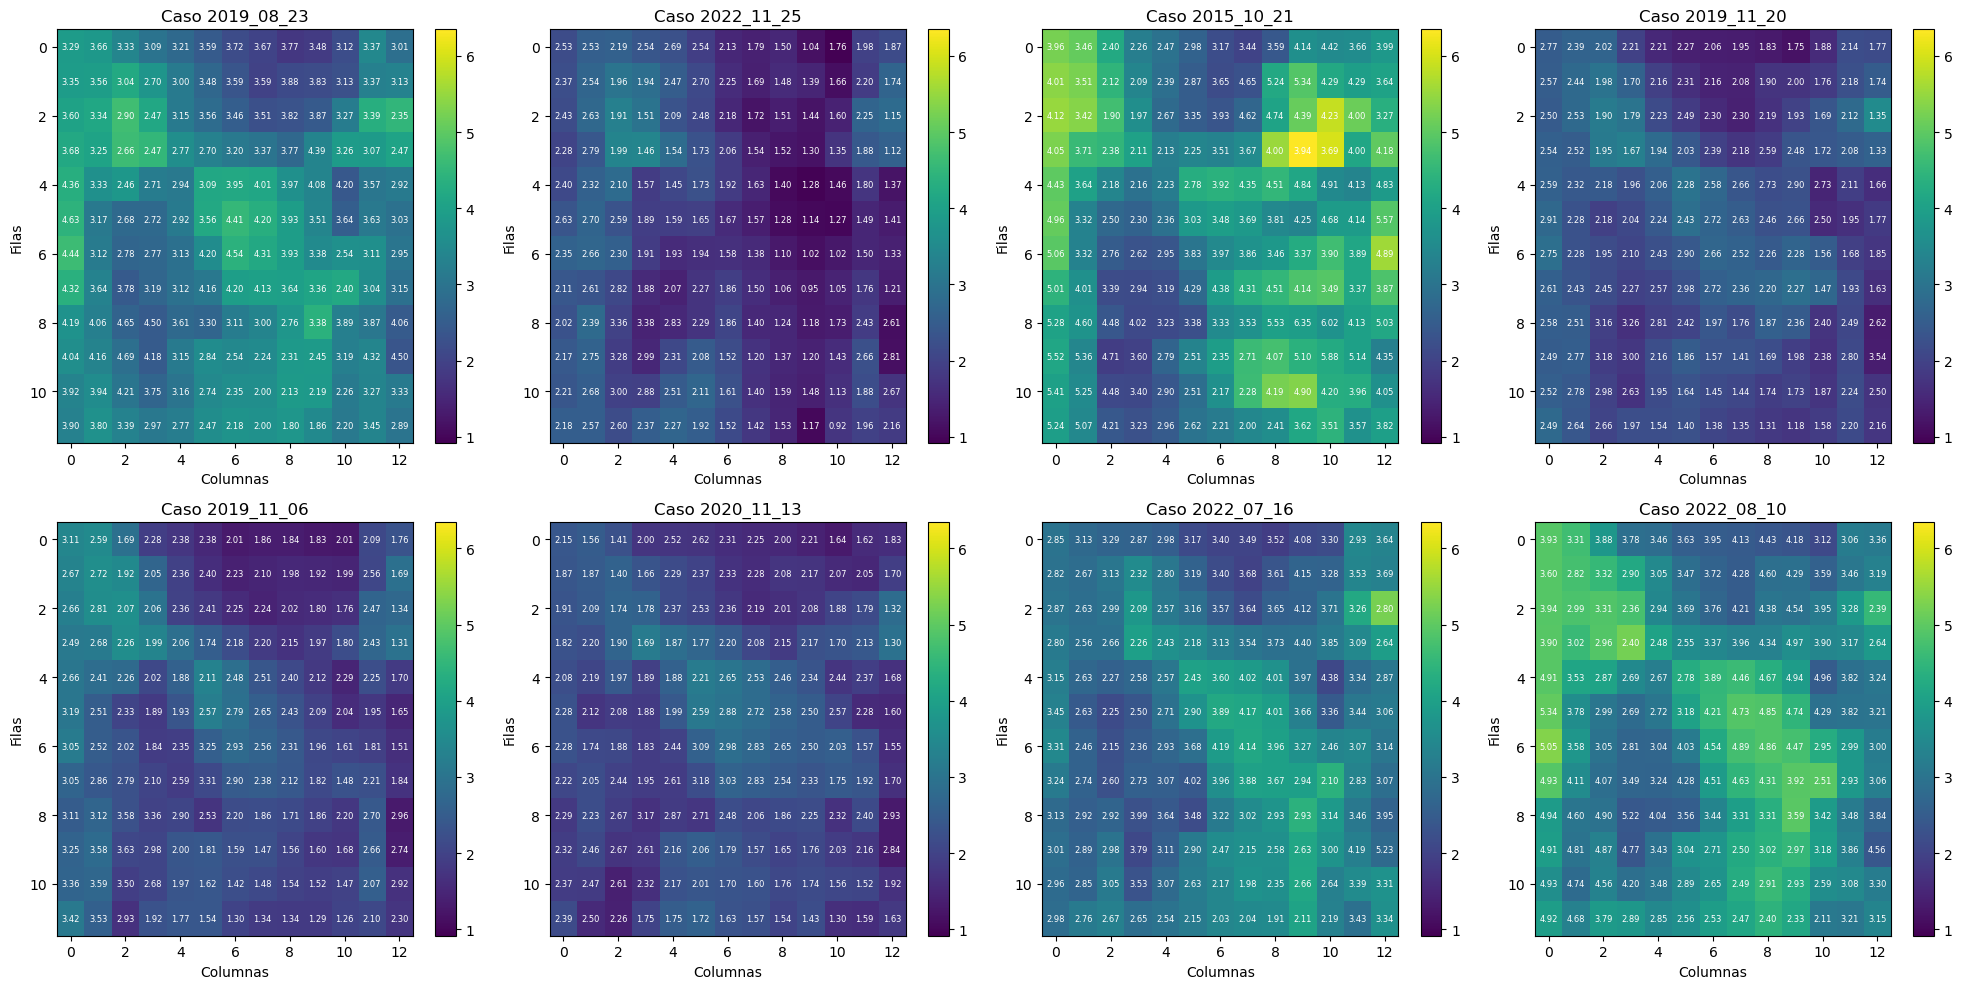

Varianza de la variable V10 por cuadrante para cada caso.


In [10]:
data_list = [  np.array([valor[i][1] for valor in array_156]).reshape((12, 13)) for i in range(8)]
titles = [f'Caso {fechas_val[i]}' for i in range(8)]


all_data = np.concatenate(data_list, axis=0)  
vmax = all_data.max()
vmin = all_data.min()

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 filas y 4 columnas

for ax, data, title in zip(axes.flat, data_list, titles):
    im = ax.imshow(data[::-1], cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    ax.set_title(title)
    ax.set_xlabel('Columnas')
    ax.set_ylabel('Filas')
    
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=6)

    plt.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

print("Varianza de la variable V10 por cuadrante para cada caso.")

#### 4.5. Matriz de correlación

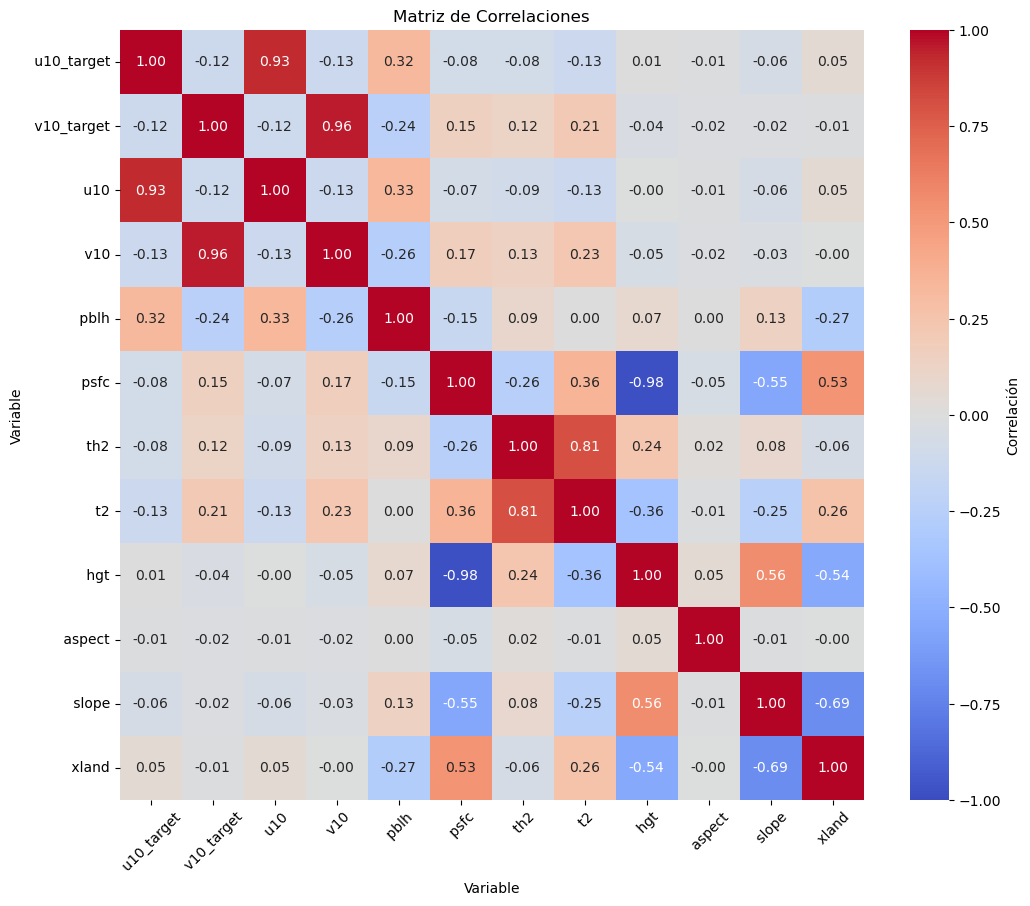

CPU times: user 8.34 s, sys: 49.3 s, total: 57.7 s
Wall time: 4min 1s


In [11]:
%%time 

import seaborn as sns

var_names  =["u10", "v10",  "pblh", "psfc", "th2", "t2", "hgt", "aspect", "slope", "xland",]


data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/{var}_input_raw_190824_16_va.npy")[:,:,:,0] for var in var_names]

data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/v10_target_raw_190824_16_va.npy")[:,:,:,0]] + data_list 
data_list = [ np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/u10_target_raw_190824_16_va.npy")[:,:,:,0]] + data_list 

var_names = ["u10_target", "v10_target"] + var_names

flattened_data = [data.flatten() for data in data_list]

data_matrix = np.array(flattened_data)
correlation_matrix = np.corrcoef(data_matrix)

variable_names = [f' {var}' for var in var_names]  

# Paso 6: Graficar la matriz de correlaciones con etiquetas personalizadas
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, 
            cbar_kws={'label': 'Correlación'},
            xticklabels=variable_names,
            yticklabels=variable_names)
plt.title('Matriz de Correlaciones')
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.show()


#### Validación de la información 

Idea: 
- Validar la reconstrucción de los parches a través de la unión de los cuadrantes. Comparar el mapa reconstruído con el mapa original. 
- Validar la información estadística utilizando la información original.
- Validar el ángulo calculado y el obtenido por WRF para la rosa de los vientos.

##### Anexo 1: 
Trabajaremos con la variable HGT para comprobar que la reconstrucción de los parches coincide con el archivo target d05.


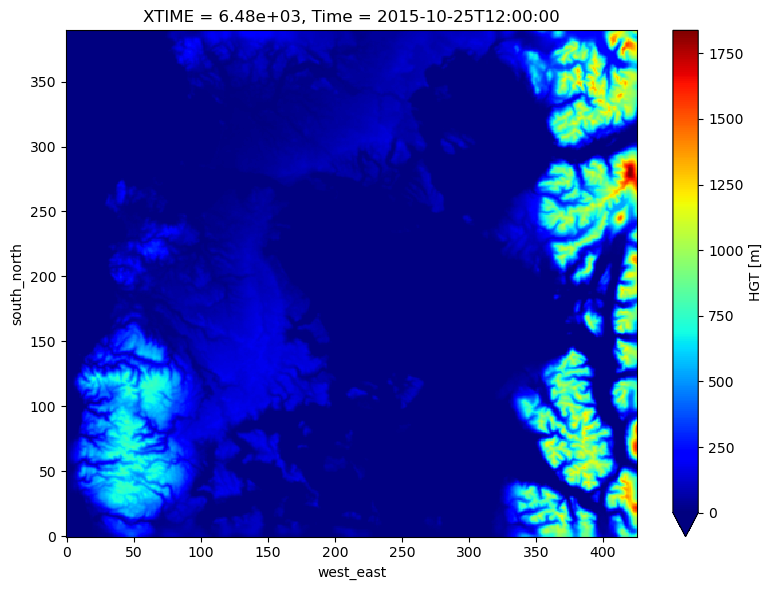

In [12]:
from netCDF4 import Dataset
from wrf import getvar


d05_file = Dataset("../../files/wrfout_d05_2015-10-25_12%3A00%3A00")
d05_hgt = getvar(d05_file, "HGT")

fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

d05_hgt.plot(ax=ax1, cmap="jet", vmin=0)
plt.tight_layout()
plt.show()

In [13]:
hgt_input = np.load(f"../../parches_winscp/bicubic_32_32/190824_16_va/raw/hgt_input_raw_190824_16_va.npy")[:156,:,:,0]
print(hgt_input.shape)

(156, 32, 32)


Para efectos de nuestro tensor importado, se hace necesario aplicar la notación ```[::-1]``` post importación ya que el corte de los parches se hizo de una manera distinta a la reconstrucción de estos. De una manera muy superficial y con la posibilidad de caer en errores, dado el mapa completo, el corte de parches se hizo de abajo para arriba, mientras que la reconstrucción de arriba para abajo, por lo mismo, al agregar esta notación a nuestro tensor lo que hacemos es reflejarlo respecto a la fila del medio, es decir, la primera fila pasa a ser la última, la segunda la penúltima y así, logrando reconstruir el mapa original.

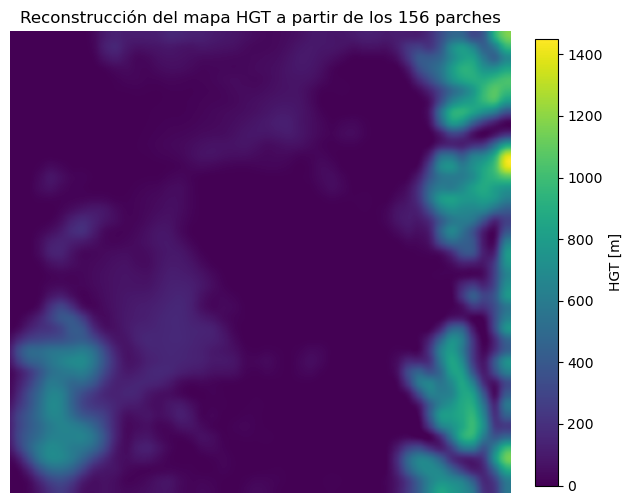

In [14]:
num_rows = 12; num_cols = 13

new_array = np.zeros((num_rows * 32, num_cols * 32))

# Llenar el nuevo array con los parches
for i in range(num_rows):
    for j in range(num_cols):
        # Calcular el índice del parche en el tensor original
        index = i * num_cols + j
        if index < 156:
            # Calcular las posiciones en el nuevo array
            new_array[i*32:(i+1)*32, j*32:(j+1)*32] = hgt_input[index]


plt.figure(figsize=(8, 6))
img = plt.imshow(new_array[::-1], cmap='viridis', vmin=0)
cbar = plt.colorbar(img, fraction=0.036, pad=0.04)
cbar.set_label('HGT [m]', fontsize=10)
plt.title('Reconstrucción del mapa HGT a partir de los 156 parches', fontsize=12)
plt.axis('off')
plt.show()

#### Anexo 2 

Para efectos del segundo tipo de validación, nos interesa comprobar que los estadísticos calculados previamente en este fichero coinciden con los calculados utilizando los archivos originales, entiéndase por archivo original a los creados por el fichero [as_saving_patches.py (Ángel Santos)](https://github.com/sivar-austral/AS_Sivar/blob/main/as_saving_patches.py).

Los casos a revisar serán ```2022_08_10``` y ```2022_07_16```.

In [15]:
import glob 
import os 

def original_files(caso, vars=["u10","v10"]): 

    tensores={}
    for var in vars:
        path = "../../Datos_test/" + var + "/" + caso
        d03_files = sorted( glob.glob(os.path.join(path, '*d03*.npy')) )

        if len(d03_files) == 121: 
            d03_files.pop() 
        
        d03_files = d03_files[5:]

        tensor  = [np.load(archivo)[0] for archivo in d03_files]
        tensor =  np.concatenate(tensor, axis=0)
        tensores[var] = tensor 

    return tensores

def comparacion_tensor(tensor_1, tensor_2, var_name):
    comparacion= np.array_equal(tensor_1, tensor_2)
    if comparacion: 
        print(f"Los tensores para la variable {var_name} son iguales")
    else:
        print("No son iguales, revise de nuevo")  

In [16]:
vars_og_6= original_files("2022_07_16")
u10_og_6 = vars_og_6["u10"]
v10_og_6 = vars_og_6["v10"]
print(f"Dimensiones de la variable u10_og_6: {u10_og_6.shape} y v10_og_6: {v10_og_6.shape}")

Dimensiones de la variable u10_og_6: (17940, 32, 32) y v10_og_6: (17940, 32, 32)


In [17]:
#variable usada en este fichero
i=6
u10_imp_6 = np.load(f"{path}u10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]  
v10_imp_6 = np.load(f"{path}v10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]  
print(f"Dimensiones de la variable u10_imp_6: {u10_imp_6.shape} y v10_imp_6: {v10_imp_6.shape}")

Dimensiones de la variable u10_imp_6: (17940, 32, 32) y v10_imp_6: (17940, 32, 32)


Comparación de los tensores originales versus los importados para el caso ```2022_07_16```

In [18]:
comparacion_tensor(u10_og_6, u10_imp_6, "u10")
comparacion_tensor(v10_og_6, v10_imp_6, "v10")

Los tensores para la variable u10 son iguales
Los tensores para la variable v10 son iguales


Comparación de los tensores originales versus los importados para el caso ```2022_08_10```

In [19]:
vars_og_7 = original_files("2022_08_10")
u10_og_7  = vars_og_7["u10"]
v10_og_7  = vars_og_7["v10"]
print(f"Dimensiones de la variable u10_og_7: {u10_og_7.shape} y v10_og_7: {v10_og_7.shape}")

i=7
u10_imp_7 = np.load(f"{path}u10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]  
v10_imp_7 = np.load(f"{path}v10_input_raw_190824_16_va.npy")[i*(115*156):(115*156)*(i+1),:,:,0]  
print(f"Dimensiones de la variable u10_imp_7: {u10_imp_7.shape} y v10_imp_7: {v10_imp_7.shape}")

comparacion_tensor(u10_og_7, u10_imp_7, "u10")
comparacion_tensor(v10_og_7, v10_imp_7, "v10")

Dimensiones de la variable u10_og_7: (17940, 32, 32) y v10_og_7: (17940, 32, 32)
Dimensiones de la variable u10_imp_7: (17940, 32, 32) y v10_imp_7: (17940, 32, 32)
Los tensores para la variable u10 son iguales
Los tensores para la variable v10 son iguales


Como se pudo comprobar, la manera de seleccionar los parches correspondiente a un caso en específico: ```[i*(115*156):(115*156)*(i+1),:,:,0] ``` coincide con la información de los archivos originales (simple formalidad nada más). Ahora corresponde verificar si los estadísticos calculados coinciden: 

In [43]:
u10_stats = mostrar_stats("u10")

print("[min] u10 og: ", np.min(u10_og_6),"u10 imp: ",u10_stats.loc["2022_07_16"]["min"]) 
print("[min] u10 og: ", np.max(u10_og_6),"u10 imp: ",u10_stats.loc["2022_07_16"]["max"]) 
print("[min] u10 og: ", np.median(u10_og_6),"u10 imp: ",u10_stats.loc["2022_07_16"]["mediana"]) 
print("[min] u10 og: ", np.mean(u10_og_6),"u10 imp: ",u10_stats.loc["2022_07_16"]["mean"]) 
print("[min] u10 og: ", np.std(u10_og_6),"u10 imp: ",u10_stats.loc["2022_07_16"]["std"])
print("[min] u10 og: ", np.var(u10_og_6),"u10 imp: ",u10_stats.loc["2022_07_16"]["var"])  

print("*"*50)
print("[min] u10 og: ", np.min(u10_og_7),"u10 imp: ",u10_stats.loc["2022_08_10"]["min"]) 
print("[min] u10 og: ", np.max(u10_og_7),"u10 imp: ",u10_stats.loc["2022_08_10"]["max"]) 
print("[min] u10 og: ", np.median(u10_og_7),"u10 imp: ",u10_stats.loc["2022_08_10"]["mediana"]) 
print("[min] u10 og: ", np.mean(u10_og_7),"u10 imp: ",u10_stats.loc["2022_08_10"]["mean"]) 
print("[min] u10 og: ", np.std(u10_og_7),"u10 imp: ",u10_stats.loc["2022_08_10"]["std"])
print("[min] u10 og: ", np.var(u10_og_7),"u10 imp: ",u10_stats.loc["2022_08_10"]["var"]) 

Estadísticos para la variable u10
[min] u10 og:  -11.212531 u10 imp:  -11.212531
[min] u10 og:  17.731998 u10 imp:  17.731998
[min] u10 og:  3.2764318 u10 imp:  3.2764318
[min] u10 og:  3.4372308 u10 imp:  3.4372308
[min] u10 og:  3.5445893 u10 imp:  3.5445893
[min] u10 og:  12.564114 u10 imp:  12.564114
**************************************************
[min] u10 og:  -8.908405 u10 imp:  -8.908405
[min] u10 og:  19.809568 u10 imp:  19.809568
[min] u10 og:  2.7861948 u10 imp:  2.7861948
[min] u10 og:  3.5982292 u10 imp:  3.5982292
[min] u10 og:  4.013106 u10 imp:  4.013106
[min] u10 og:  16.105019 u10 imp:  16.105019


In [44]:
v10_stats = mostrar_stats("v10")

print("[min] u10 og: ", np.min(v10_og_6),"u10 imp: ",v10_stats.loc["2022_07_16"]["min"]) 
print("[min] u10 og: ", np.max(v10_og_6),"u10 imp: ",v10_stats.loc["2022_07_16"]["max"]) 
print("[min] u10 og: ", np.median(v10_og_6),"u10 imp: ",v10_stats.loc["2022_07_16"]["mediana"]) 
print("[min] u10 og: ", np.mean(v10_og_6),"u10 imp: ",v10_stats.loc["2022_07_16"]["mean"]) 
print("[min] u10 og: ", np.std(v10_og_6),"u10 imp: ",v10_stats.loc["2022_07_16"]["std"])
print("[min] u10 og: ", np.var(v10_og_6),"u10 imp: ",v10_stats.loc["2022_07_16"]["var"])  

print("*"*50)
print("[min] u10 og: ", np.min(v10_og_7),"u10 imp: ",v10_stats.loc["2022_08_10"]["min"]) 
print("[min] u10 og: ", np.max(v10_og_7),"u10 imp: ",v10_stats.loc["2022_08_10"]["max"]) 
print("[min] u10 og: ", np.median(v10_og_7),"u10 imp: ",v10_stats.loc["2022_08_10"]["mediana"]) 
print("[min] u10 og: ", np.mean(v10_og_7),"u10 imp: ",v10_stats.loc["2022_08_10"]["mean"]) 
print("[min] u10 og: ", np.std(v10_og_7),"u10 imp: ",v10_stats.loc["2022_08_10"]["std"])
print("[min] u10 og: ", np.var(v10_og_7),"u10 imp: ",v10_stats.loc["2022_08_10"]["var"]) 

Estadísticos para la variable v10
[min] u10 og:  -21.635998 u10 imp:  -21.635998
[min] u10 og:  14.802278 u10 imp:  14.802278
[min] u10 og:  -4.2968626 u10 imp:  -4.2968626
[min] u10 og:  -4.5524883 u10 imp:  -4.5524883
[min] u10 og:  5.2793427 u10 imp:  5.2793427
[min] u10 og:  27.871458 u10 imp:  27.871458
**************************************************
[min] u10 og:  -22.107195 u10 imp:  -22.107195
[min] u10 og:  9.235903 u10 imp:  9.235903
[min] u10 og:  -4.9779444 u10 imp:  -4.9779444
[min] u10 og:  -5.469386 u10 imp:  -5.469386
[min] u10 og:  3.9516447 u10 imp:  3.9516447
[min] u10 og:  15.615495 u10 imp:  15.615495


#### Anexo 3: Validación Rosa de los Vientos

El objetivo en este punto es comprobar que la dirección calculada para los gráficos de Rosa de Vientos coincide con la dirección entregada por la variable ```wsp_sdir01``` (aquí llamada dir). Para efectos de crear un gráfico de este estilo, se necesitan dos variables: la velocidad y la dirección (ambos como tensores aplanados). Para variable ```dir```, calcularemos su velocidad utilizando los tensores ```u10_og_i``` y ```v10_og_i``` del anexo anterior, mientras que para la dirección calculada manualmente, calcularemos su velocidad asociada utilizando los tensores ```u10_imp_i``` y ```v10_imp_i``` (donde i es 6 o 7 según el caso analizado)

In [61]:
dir_6 = "../../Datos_test/dir/" + "2022_07_16"
dir_7 = "../../Datos_test/dir/" + "2022_08_10"

files_dir_6 = sorted( glob.glob(os.path.join(dir_6, '*d03*.npy')) )[5:]
files_dir_7 = sorted( glob.glob(os.path.join(dir_7, '*d03*.npy')) )
files_dir_7.pop()
files_dir_7 = files_dir_7[5:]

datos_dir_6  = [np.load(archivo)[0] for archivo in files_dir_6]
datos_dir_7  = [np.load(archivo)[0] for archivo in files_dir_7]

dir_og_6 = np.concatenate(datos_dir_6, axis=0)
dir_og_7 = np.concatenate(datos_dir_7, axis=0)

vel_og_6 = np.sqrt( u10_og_6**2 + v10_og_6**2 )
vel_og_7 = np.sqrt( u10_og_7**2 + v10_og_7**2 )

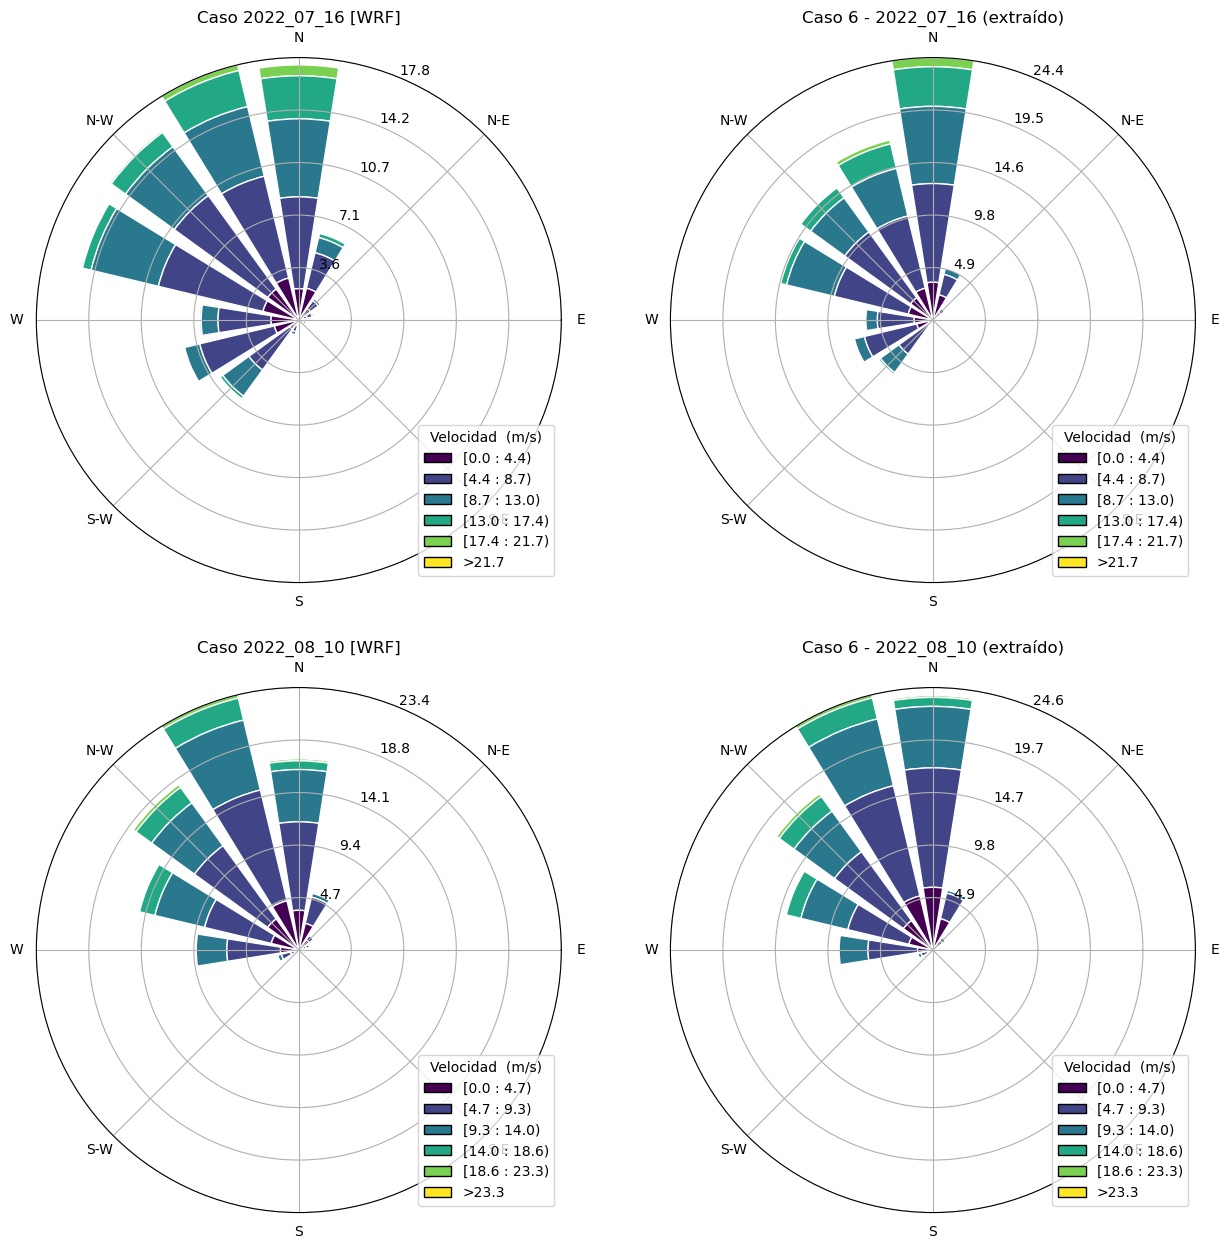

In [108]:
fig, axs = plt.subplots(2, 2, subplot_kw={'projection': 'windrose'}, figsize=(15, 15))

axs[0][0].bar(dir_og_6.flatten(), vel_og_6.flatten(), normed=True, opening=0.8, edgecolor='white')
axs[0][0].set_title(f'Caso 2022_07_16 [WRF]', fontsize=12)
axs[0][0].legend(title="Velocidad  (m/s)", loc="lower right", fontsize=10)


vel_imp_6 =  np.sqrt(u10_imp_6**2 + v10_imp_6**2)
dir_imp_6 =  (np.arctan2(-u10_imp_6, -v10_imp_6) * (180 / np.pi)) % 360

axs[0][1].bar(dir_imp_6.flatten(), vel_imp_6.flatten(), normed=True, opening=0.8, edgecolor='white')
axs[0][1].set_title(f'Caso 6 - 2022_07_16 (extraído)', fontsize=12)
axs[0][1].legend(title="Velocidad  (m/s)", loc="lower right", fontsize=10)


axs[1][0].bar(dir_og_7.flatten(), vel_og_7.flatten(), normed=True, opening=0.8, edgecolor='white')
axs[1][0].set_title(f'Caso 2022_08_10 [WRF]', fontsize=12)
axs[1][0].legend(title="Velocidad  (m/s)", loc="lower right", fontsize=10)


vel_imp_7 =  np.sqrt(u10_imp_7**2 + v10_imp_7**2)
dir_imp_7 =  (np.arctan2(-u10_imp_7, -v10_imp_7) * (180 / np.pi)) % 360

axs[1][1].bar(dir_imp_7.flatten(), vel_imp_7.flatten(), normed=True, opening=0.8, edgecolor='white')
axs[1][1].set_title(f'Caso 6 - 2022_08_10 (extraído)', fontsize=12)
axs[1][1].legend(title="Velocidad  (m/s)", loc="lower right", fontsize=10)

Así bien al ojímetro se puede observar una gran diferencia en las velocidades entre los archivos originales y los importados (calculados en el fichero anterior) pero no así en el ángulo calculado. Revisaremos las diferencias entre las direciones y velocidades calculadas para ver dónde puede estar la diferencia:

In [88]:
comparacion_tensor(vel_og_6, vel_imp_6, "vel_6")
comparacion_tensor(vel_og_7, vel_imp_7, "vel_7")

Los tensores para la variable vel_6 son iguales
Los tensores para la variable vel_7 son iguales


Los cálculos para las velocidades provenientes de los archivos importados versus los originales coinciden, lo que significa que el problema está en las direcciones calculadas: 

In [104]:
dir_og_6 = (dir_og_6 + 360) % 360 
comparacion_tensor(dir_og_6, dir_imp_6, "dir_6")
comparacion_tensor(dir_og_7, dir_imp_7, "dir_6")

No son iguales, revise de nuevo
No son iguales, revise de nuevo


In [105]:
diff_dir_6 = dir_og_6.flatten() - dir_imp_6.flatten()
diff_dir_6[:10]


array([-0.01071167, -0.01348877, -0.01123047, -0.00473022,  0.00338745,
        0.00888062,  0.00790405,  0.01574707,  0.03765869,  0.05917358],
      dtype=float32)

In [106]:
diferencia_max = np.max(diff_dir_6)
diferencia_media = np.mean(diff_dir_6)
diferencia_mediana = np.median(diff_dir_6)
diferencia_std = np.std(diff_dir_6)

print(f"Diferencia max: {diferencia_max:.2f} grados")
print(f"Diferencia media: {diferencia_media:.2f} grados")
print(f"Diferencia mediana: {diferencia_mediana:.2f} grados")
print(f"Desviación estándar de la diff_dir_6: {diferencia_std:.2f} grados")


Diferencia max: 360.00 grados
Diferencia media: -1.48 grados
Diferencia mediana: -0.00 grados
Desviación estándar de la diff_dir_6: 90.96 grados
